# Analysis of Medical Insurance Cost

This project is to analyse a dataset that consists of a collection of medical insurance costs from different individuals in the United States. The dataset also includes basic information of individuals such as age, sex and body mass index (bmi). The purpose of this analysis is to investigate and determine the factors that affect medical cost.

The dataset was cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes. The dataset is provided by a user from Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download). We will be using Python to analyze the dataset and a series of visualisations such as pandas, seaborn, matplotlib and SciPy libraries to answer the following questions:

1. How does age affect the cost of insurance? 
2. Which region has the highest insurance cost?
3. Is Body Mass Index (BMI) a major factor in insurance cost?
3. Do male or females generally pay more for insurance?
4. On average, how much does smoking affect insurance cost?
6. How does the number of children co-relate to insurance cost?

## Import Libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib import pyplot as plt 
plt.rcParams['figure.dpi']= 100

insurance_data = pd.read_csv('insurance.csv')

## Load and Inspect Data

In [38]:
insurance_data.info()
insurance_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset contains 1338 rows and 7 columns containing medical information on different people. This dataset was cleaned and pre-processed for ease of analysis hence, there are no missing values. Here's a quick summary of the columns:

Here's a quick summary of the columns:

- **Age**: Age of primary beneficiary [years]
- **Sex**: Gender of the individual [male, female]
- **BMI**: Body Mass Index (A person's weight in kilograms divided by the square of height in meters) [kg/m^3]
- **Children**: Number of children covered by health insurance
- **Smoker**: [Yes:Smoker, No:Non-smoker]
- **Region**: The beneficiary's residential area in the US [northeast, southeast, southwest, northwest]
- **Charges**: Individual medical costs billed by health insurance


# Data Cleaning and Preparation

Before answering the data questions, the datatset should be cleaned and prepared for easier analysis and visualisation by:
- Cleaning the column names
- Cleaning row value texts (For example: 'male' to 'Male')
- Rounding all of the float numbers to 2 decimal places 

In [39]:
def clean_df_text(df):
    # clean the column name texts
    df.columns = df.columns.str.strip()

    # clean the row value texts
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.title()
            df[column] = df[column].str.strip()
            
     # rounds off numerical values to 2 d.p       
        if df[column].dtype == 'float64':
            df[column] = df[column].round(2)
        
    return df

# to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+200, y[i], ha = 'center', weight = 'normal')

In [40]:
insurance = clean_df_text(insurance_data)
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,Female,27.90,0,Yes,Southwest,16884.92
1,18,Male,33.77,1,No,Southeast,1725.55
2,28,Male,33.00,3,No,Southeast,4449.46
3,33,Male,22.70,0,No,Northwest,21984.47
4,32,Male,28.88,0,No,Northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,Male,30.97,3,No,Northwest,10600.55
1334,18,Female,31.92,0,No,Northeast,2205.98
1335,18,Female,36.85,0,No,Southeast,1629.83
1336,21,Female,25.80,0,No,Southwest,2007.94


# Data Visualisations

## Data Question 1: How does age affect the cost of insurance? 

In [41]:
# Calcalating average age and average insurance cost
average_age = np.mean(insurance.age)
average_cost = np.mean(insurance.charges)
print('The average age of patients in this dataset is', round(average_age,2), 'years old.')
print('The average cost of insurance is $'+ str(round(average_cost,2)) + '.')

The average age of patients in this dataset is 39.21 years old.
The average cost of insurance is $13270.42.


In [147]:
# Creating age variables
age_list = [0,0,0,0,0,0]
age_group = ['below 20' ,'20 to 30', '30 to 40', '40 to 50', '50 to 60', 'above 60']
total_age_insurance = [0,0,0,0,0,0]
avg_insurance = []
per_chg = []

# Finding total insurance cost for each age group
for i in range(0, len(insurance)):
    if insurance.age[i] < 20:
        age_list[0] += 1
        total_age_insurance[0] += insurance.charges[i]
    elif insurance.age[i] >= 20 and insurance.age[i] < 30:
        age_list[1] += 1
        total_age_insurance[1] += insurance.charges[i]
    elif insurance.age[i] >= 30 and insurance.age[i] < 40:
        age_list[2] += 1
        total_age_insurance[2] += insurance.charges[i]
    elif insurance.age[i] >= 40 and insurance.age[i] < 50:
        age_list[3] += 1
        total_age_insurance[3] += insurance.charges[i]
    elif insurance.age[i] >= 50 and insurance.age[i] < 60:
        age_list[4] += 1
        total_age_insurance[4] += insurance.charges[i]
    elif insurance.age[i] >= 60:
        age_list[5] += 1
        total_age_insurance[5] += insurance.charges[i]

# Calculating average insurance cost for each age group
for i in range(0, len(total_age_insurance)):
    rounded_avg = round(total_age_insurance[i] / age_list[i],1)
    avg_insurance.append(rounded_avg)

# Finding percentage increase in cost between each age group 
for i in range(1, len(avg_insurance)):
    rounded_perc = round((((avg_insurance[i]-avg_insurance[i-1])/avg_insurance[i-1])*100),2)
    per_chg.append(rounded_perc)

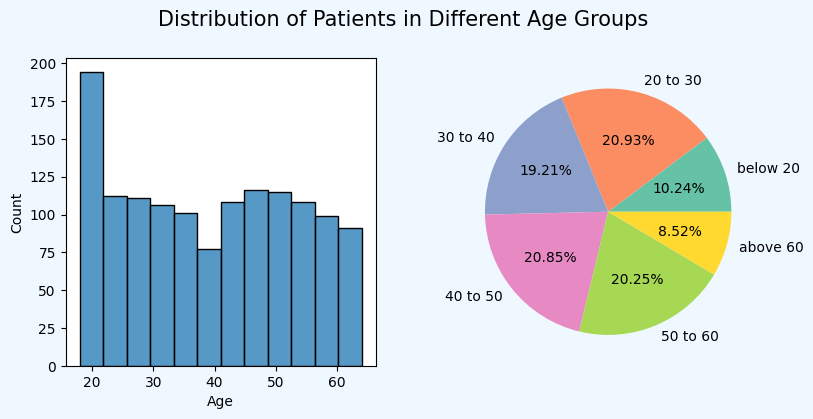

In [191]:
# Finding distribution of age
fig = plt.figure(facecolor = 'aliceblue', figsize = (9, 4))
fig.suptitle("Distribution of Patients in Different Age Groups", fontsize = 15, y = 1.0)
plt.subplots_adjust(wspace=0.25,hspace=0.7)

plt.subplot(1,2,1)
sns.histplot(data = insurance, x = 'age')
plt.xlabel('Age')
# plt.title('Age Distribution')

plt.subplot(1,2,2)
palette_pie = sns.color_palette("Set2")
plt.pie(x = age_list, labels= age_group, autopct= '%1.2f%%', colors = palette_pie)
plt.show()

The figure above shows the distribution of age among the patients. The bar chart (on the left) indicates that a significant number of patients are within the age range of 20, with approximately 190 people. The pie chart on the left validates that as it demonstrates that nearly 21% of all patients are between the age of 20 and 30. There are the lowest number of people who are ages above 60 with approximately 8.5%. For age groups of 30 to 40, 40 to 50 and 50 to 60, it is almost evenly distributed with only less than 2% difference among them. 

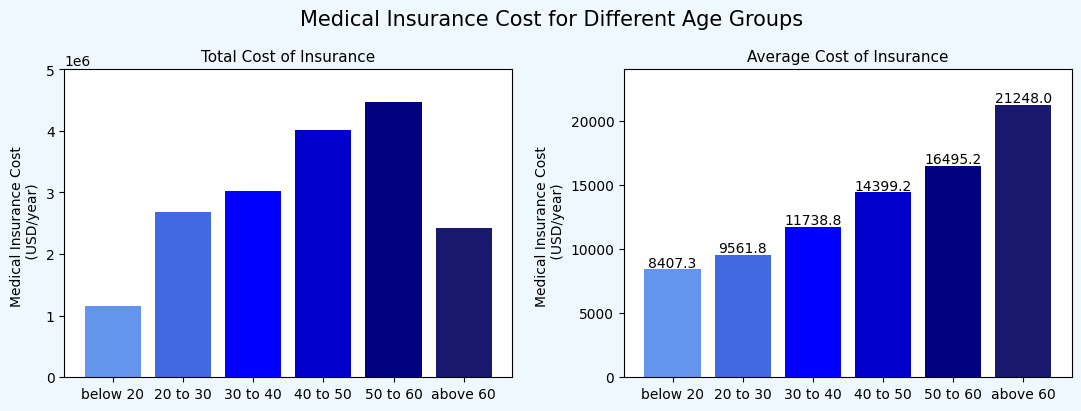

[13.73, 22.77, 22.66, 14.56, 28.81]


In [192]:
# Plotting total and average insurance cost bar charts
fig = plt.figure(facecolor = 'aliceblue', figsize = (13, 4))
fig.suptitle("Medical Insurance Cost for Different Age Groups", fontsize = 15, y = 1.03)
plt.subplots_adjust(wspace=0.25,hspace=0.7)
        
plt.subplot(1,2,1)
plt.bar(x = age_group, height = total_age_insurance, color = ['cornflowerblue', 'royalblue', 'blue', 'mediumblue', 
                                                                                       'navy','midnightblue'])
plt.title('Total Cost of Insurance', fontsize = 11)
plt.ylabel('Medical Insurance Cost \n (USD/year)')
plt.ylim(0, 5000000)

plt.subplot(1,2,2)
plt.bar(x = age_group, height = avg_insurance, color = ['cornflowerblue', 'royalblue', 'blue', 'mediumblue','navy','midnightblue'])
addlabels(age_group, avg_insurance)
plt.title('Average Cost of Insurance', fontsize = 11)
plt.ylabel('Medical Insurance Cost \n (USD/year)')
plt.ylim(0, 24000)
plt.show()

print(per_chg)

From the bar charts above, it suggests that there is a direct correlation between age and insurance costs. The bar chart on the left and on the right demonstrates the total insurance cost and average insurance cost for each age group respectively. For the total cost of insurance, the trend is clearly positive with age. However, for patients above 60, they have the lowest total insurance cost. This could be due to the number of patients who are at this age range. Despite that, they have the highest average medical insurance cost, with more than $21000/year. It was found that the percentage change in insurance cost between the age groups were approximately 13.73%, 22.77%, 22.66%, 14.56%, 28.81% respectively. Between the age group of 50 to 60 and above 60 years old, there is noticeable increase. This could the cause of an increase in patient injuries as they age past 60.

## Data Question 2: Which region has the highest insurance cost?

In [44]:
# Region count
region = insurance.region.value_counts().rename_axis('Region').reset_index(name='Count')
region

,Region,Count
0,Southeast,364
1,Southwest,325
2,Northwest,325
3,Northeast,324


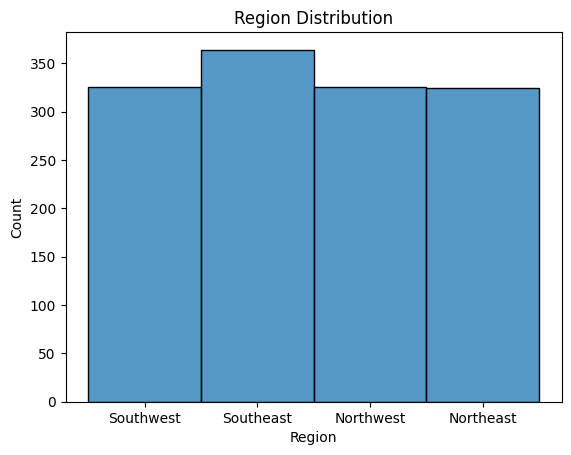

In [195]:
# Finding distribution of patients in different regions
region_dist = sns.histplot(data = insurance, x = 'region')
plt.xlabel('Region')
plt.title('Region Distribution')
plt.show()

The southeast region of the United States seem to have the highest number of patients, by a small margin. 

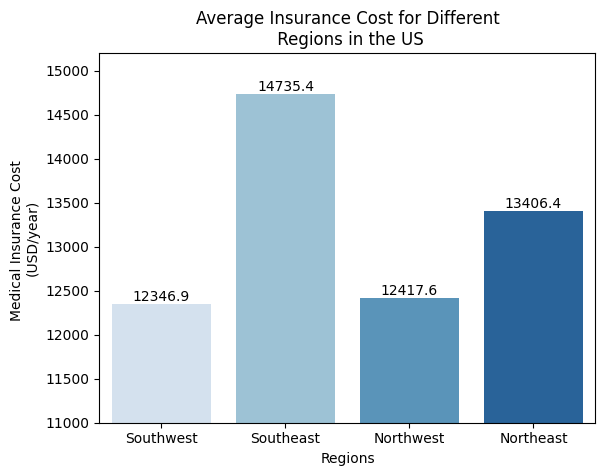

In [61]:
# Plotting average insurance cost in each region
region_plot = sns.barplot(data = insurance, x = 'region', y = 'charges', ci =None, palette = 'Blues')
plt.xlabel('Regions')
plt.ylabel('Medical Insurance Cost \n(USD/year)')
plt.title('Average Insurance Cost for Different\n Regions in the US')
region_plot.bar_label(region_plot.containers[0])
plt.ylim((11000, 15200))

plt.show()

The graph above suggests that patients in the southeast region have significantly high average medical insurance cost with approximately 14735.40 USD/year, followed by the northeast region with 13406.40 USD/year. Patients in the southwest and northwest region have an averege insurance cost of approximately 12300 USD/year. *(The graph might not be an accurate representation of the signficance of region and insurance cost as there may be other factors such as age, smoking and gender that could play a role in the cost. This will be shown in the following questions)*

## Data Question 3: Is Body Mass Index (BMI) a major factor in insurance cost?

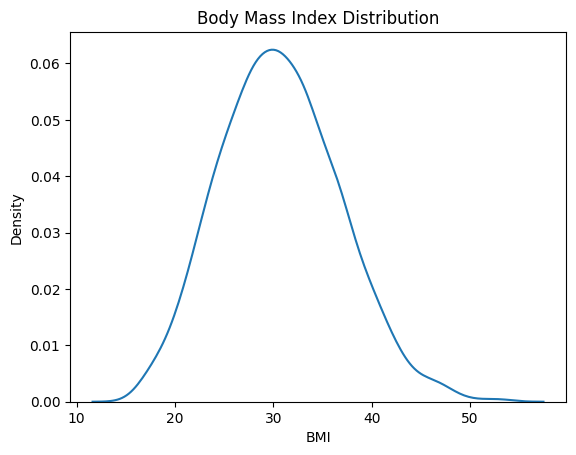

In [196]:
# Finding distribution of BMI
sns.kdeplot(data = insurance, x = 'bmi')
plt.xlabel('BMI')
plt.title('Body Mass Index Distribution')
plt.show()

The distribution shown above indicates that patients have a body mass index range of 10 to 60 and that most patients have a bmi around 30. 

In [48]:
# Calculating average and median BMI
med_bmi = np.median(insurance.bmi)
avg_bmi = round(np.average(insurance.bmi),2)

print('The median body mass index in the US is', med_bmi)
print('The average body mass index in the US is', avg_bmi)

The median body mass index in the US is 30.4
The average body mass index in the US is 30.66


In [157]:
# Categorising weight group based on BMI
bmi_group_list = ['Underweight', 'Healthy', 'Overweight']
bmi_list =[0,0,0]
bmi_insurance = [0,0,0]
avg_bmi_insurance = []

for i in range(0, len(insurance)):
    if insurance.bmi[i] < 18.5:
        bmi_list[0] += 1
        bmi_insurance[0] += insurance.charges[i]
    elif insurance.bmi[i] >= 18.5 and insurance.bmi[i] < 25:
        bmi_list[1] += 1
        bmi_insurance[1] += insurance.charges[i]
    elif insurance.bmi[i] >= 25:
        bmi_list[2] += 1
        bmi_insurance[2] += insurance.charges[i]
        
for i in range(0, len(bmi_insurance)):
    rounded_bmi_insurance = round((bmi_insurance[i]/bmi_list[i]), 1)
    avg_bmi_insurance.append(rounded_bmi_insurance)

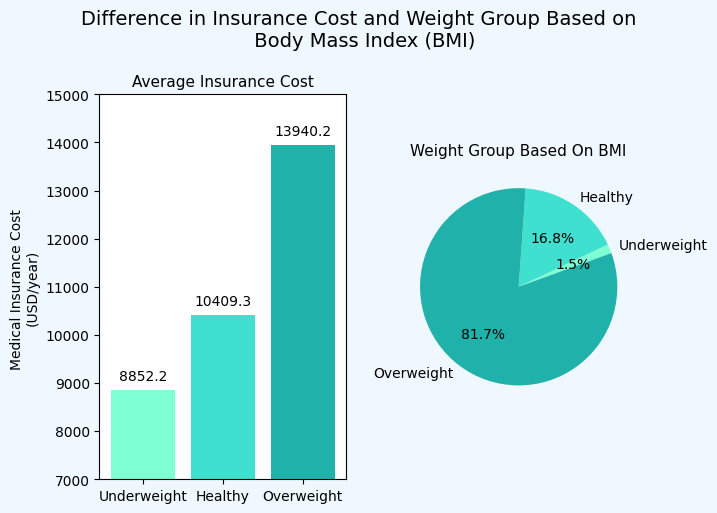

In [197]:
# Plotting average insurance cost and distribution based on BMI
fig = plt.figure(facecolor = 'aliceblue', figsize = (7, 5))
fig.suptitle("Difference in Insurance Cost and Weight Group Based on \n Body Mass Index (BMI)", fontsize = 14, y = 1.05)

plt.subplot(1,2,1)
plt.bar(x = bmi_group_list, height = avg_bmi_insurance, color = ['aquamarine','turquoise','lightseagreen'])
plt.title('Average Insurance Cost', fontsize = 11)
plt.ylabel('Medical Insurance Cost \n(USD/year)')
plt.ylim(7000, 15000)
addlabels(bmi_group_list, avg_bmi_insurance)

plt.subplot(1,2,2)
plt.pie(labels = bmi_group_list, x = bmi_list, autopct = '%1.1f%%', colors = ['aquamarine','turquoise','lightseagreen'], 
       startangle = 20)
plt.title('Weight Group Based On BMI', fontsize = 11)
plt.show()

Patients were grouped into 3 categories; Underweight, Healthy and Overweight based on their body mass index for the above analysis. Patients who have BMIs less than 18.5 were categorized as underweight whereas BMIs of 18.5 to 25 were healthy. Lastly, patients with BMIs higher than 25 were considered overweight. The bar chart (on the left) above shows the average medical insurance cost of patients and the pie chart (on the right) is a distribution pie chart of patients based on their weight group. There is a significant percentage of patients who are overweigth (more than 80%) and only 1.5% of patients are underweight.  Clearly, the cost of insurance is much higher for patients who are categorized as overweight with an average of 13940.20 USD/year. It is also important to remember that there may be other factors in play that may affect the insurance cost.

*(Note: BMI is a measure of body fat based on height and weight for men and women. It is a generalisation of the human body which does not necessarily define a person's health.)* 

## Data Question 4: Do male or females generally pay more for insurance?

In [50]:
# Gender count
sex = insurance.sex.value_counts().rename_axis('Sex').reset_index(name='Count')
sex

,Sex,Count
0,Male,676
1,Female,662


In [158]:
# Finding average insurance cost for male and female
genders = ['Male', 'Female']
total_gender_insurance = [0,0]
avg_gender_insurance = []

for i in range(0, len(insurance)):
    if insurance.sex[i] == 'Male':
        total_gender_insurance[0] += insurance.charges[i]
    else:
        total_gender_insurance[1] += insurance.charges[i]

avg_gender_insurance.append(round(total_gender_insurance[0]/sex.Count[0],1))
avg_gender_insurance.append(round(total_gender_insurance[1]/sex.Count[1],1))

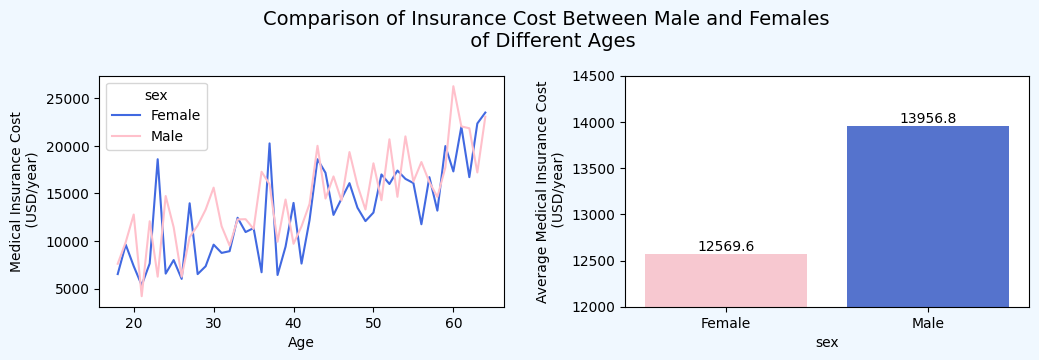

In [221]:
# Plotting insurance cost for male and females
fig = plt.figure(facecolor = 'aliceblue', figsize = (12, 3))
fig.suptitle("Comparison of Insurance Cost Between Male and Females \n of Different Ages", fontsize = 14, y = 1.1)
plt.subplots_adjust(wspace=0.3,hspace=0.7)

plt.subplot(1,2,1)
sns.lineplot(data = insurance, x = 'age', y = 'charges', hue = 'sex',  ci = None, palette = ['royalblue', 'pink'])
plt.xlabel('Age')
plt.ylabel('Medical Insurance Cost\n (USD/year)')
plt.title('')

plt.subplot(1,2,2)
gender_plot = sns.barplot(data = insurance, x = 'sex', y = 'charges', ci = None, palette = ['pink', 'royalblue'])
gender_plot.bar_label(gender_plot.containers[0])

plt.ylabel('Average Medical Insurance Cost\n (USD/year)')
plt.ylim(12000,14500)
# addlabels(genders, avg_gender_insurance)
plt.show()

# Graph might not depict that males pay more. Could be result to sample where males smoke more or are older or have higher bmi

The line graph above shows the cost of insurance for male and female patients of different ages. There is a general positive trend between age and cost. Both lines seem to fluctuate frequently but the line for male tends to fluctuate more aggressively than the female line. The bar chart signifies that male patients have a higher average insurance cost than female patients with nearly 14000 USD/year for males and 12500 USD/year for females. Even though, the average insurance cost is higher in male patients, this does not signify that gender plays a role in insurance charges. The line graph demonstrates that insurance charges for both male and female have similar trends which disproves that.

## Data Question 5: On average, how much does smoking affect insurance cost?

In [52]:
# Smoker count
smoker = insurance.smoker.value_counts().rename_axis('Smoker').reset_index(name='Count')
smoker

,Smoker,Count
0,No,1064
1,Yes,274


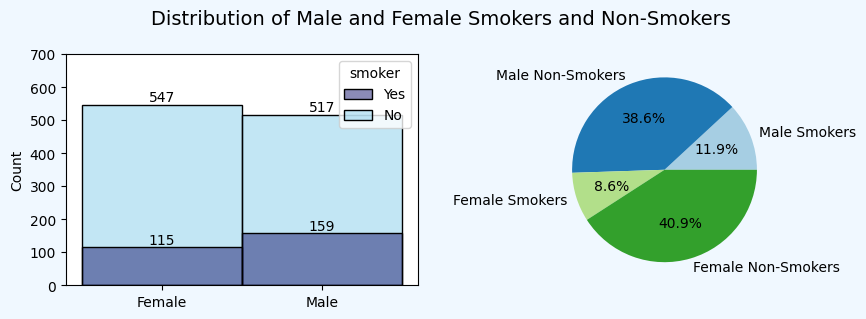

In [233]:
# Plotting male and female smoker and non-smoker count
gender_smoker_labels = ['Male Smokers', 'Male Non-Smokers', 'Female Smokers', 'Female Non-Smokers']
gender_smoker_list = [0,0,0,0]

for i in range(0, len(insurance)):
    if insurance.sex[i] == 'Male':
        if insurance.smoker[i] == 'Yes':
            gender_smoker_list[0] += 1
        else:
            gender_smoker_list[1] += 1
    if insurance.sex[i] == 'Female':
        if insurance.smoker[i] == 'Yes':
            gender_smoker_list[2] += 1
        else:
            gender_smoker_list[3] += 1

fig = plt.figure(facecolor = 'aliceblue', figsize = (10, 3))
fig.suptitle("Distribution of Male and Female Smokers and Non-Smokers", fontsize = 14, y = 1.03)
plt.subplots_adjust(wspace=0.2,hspace=0.7)

plt.subplot(1,2,1)
smoker_count = sns.histplot(data = insurance, x = 'sex', hue = 'smoker', palette = ['midnightblue', 'skyblue'])
plt.ylim(0, 700)
plt.xlabel('')
smoker_count.bar_label(smoker_count.containers[0])
smoker_count.bar_label(smoker_count.containers[1])

smoker_pie_color = sns.color_palette("Paired")
plt.subplot(1,2,2)
plt.pie(x = gender_smoker_list, labels = gender_smoker_labels, autopct= '%1.1f%%', colors = smoker_pie_color)

plt.show()

According to the graphs above, there seems to be more male smokers than female smokers approximately 11.9% and 8.6% respectively. There is also a higher percentage of female non-smokers compared to males.

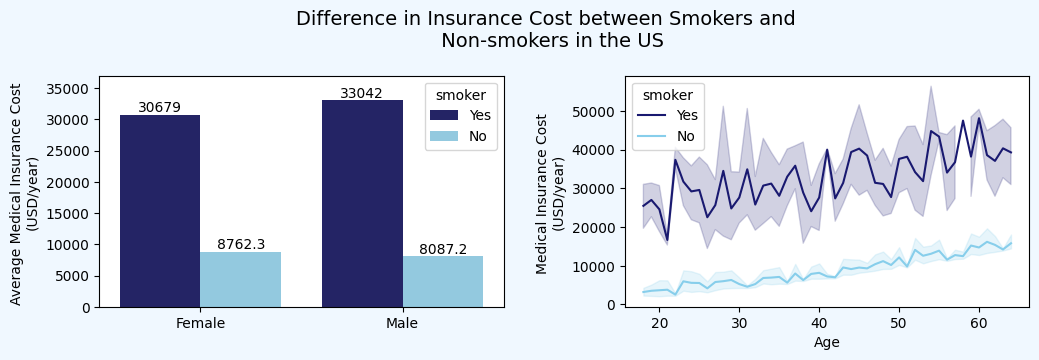

In [53]:
# Plotting average insurance cost and line graph for smokers and non-smokers
fig = plt.figure(facecolor = 'aliceblue', figsize = (12, 3))
fig.suptitle("Difference in Insurance Cost between Smokers and \n Non-smokers in the US", fontsize = 14, y = 1.1)
plt.subplots_adjust(wspace=0.3,hspace=0.7)

plt.subplot(1,2,1)
smoker_insurance = sns.barplot(data = insurance, x = 'sex', y = 'charges', ci = None, hue = 'smoker', 
                               palette = ['midnightblue', 'skyblue'])
plt.xlabel('')
plt.ylabel('Medical Insurance Cost \n(USD/year)')
plt.ylim(0, 37000)
smoker_insurance.bar_label(smoker_insurance.containers[0])
smoker_insurance.bar_label(smoker_insurance.containers[1])

plt.subplot(1,2,2)
sns.lineplot(data = insurance, x = 'age', y = 'charges', hue = 'smoker', palette = ['midnightblue', 'skyblue'])
plt.xlabel('Age')
plt.ylabel('Medical Insurance Cost \n(USD/year)')
plt.show()

The figures above shows the difference in insurance costs between smokers and non-smokers at different ages. The average male and female smoker has an insurance cost of 33042 USD/year and 30679 USD/year respectively. This is a signficant difference compared to male and female non-smokers, about a 250% increase. The line graph also reaffirms that smokers have a higher insurance cost in spite of other factors. The line for smokers is always higher than the non-smoker line regardless of age. This demonstrates that smoking is a crucial factor in insurance cost.

## Data Question 6: How does the number of children co-relate to insurance cost?

In [54]:
# Children count
children = insurance.children.value_counts().rename_axis('Children').reset_index(name='Count')
children

,Children,Count
0,0,574
1,1,324
2,2,240
3,3,157
4,4,25
5,5,18


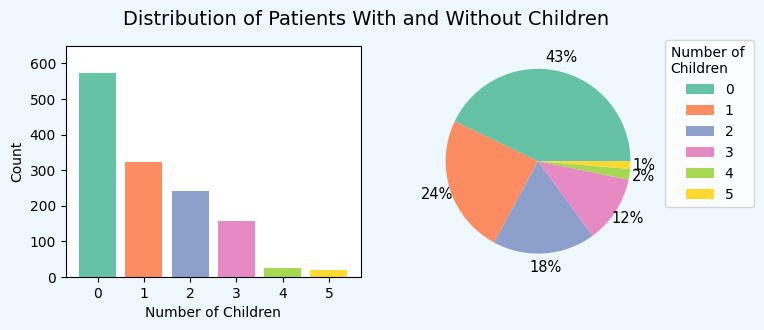

In [262]:
# Plotting distribution of patients with children
fig = plt.figure(facecolor = 'aliceblue', figsize = (8, 3))
fig.suptitle("Distribution of Patients With and Without Children", fontsize = 14, y = 1)
plt.subplots_adjust(wspace=0.1,hspace=0.7)
children_pie_palette = sns.color_palette("Set2")

plt.subplot(1,2,1)
plt.bar(x = children.Children, height = children.Count, color = children_pie_palette)
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.ylim(0, 650)

plt.subplot(1,2,2)
plt.pie(x = children.Count, autopct = '%1.0f%%', pctdistance = 1.15, rotatelabels = True, colors = children_pie_palette, textprops = {'fontsize':10.5})
plt.legend(children.Children, title = 'Number of \nChildren', loc = (1.05,0.3))
plt.show()

It seems that majority of patients do not have children, roughly 43%. The number of patients decreases gradually as the number of children increases. There is small percentage of patients with 4 and 5 children, approximately 2% and 1% respectively.

In [56]:
# Finding insurance cost of male non-smokers depending on no. of children
children_total_insurance = []
children_insurance_count = 0
avg_children_insurance = 0
count_children = 0

for number_children in children.Children:
    for n in range(0, len(insurance)):
        if insurance.sex[n] == 'Male' and insurance.smoker[n] == 'No':
            if insurance.children[n] == number_children:
                children_insurance_count += insurance.charges[n]
                count_children += 1
    avg_children_insurance = round(children_insurance_count/count_children,2)
    children_total_insurance.append(avg_children_insurance)
    avg_children_insurance = 0
    children_insurance_count = 0

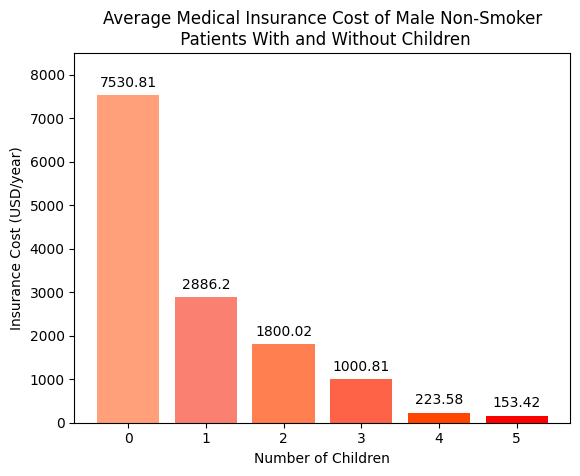

In [98]:
# Plotting average medical cost for male non-smokers with children 
color_palette = sns.color_palette("flare", as_cmap=True)

plt.bar(x = children.Children, height = children_total_insurance, color = ['lightsalmon', 'salmon', 'coral', 'tomato', 'orangered'
                                                                          , 'red'])
addlabels(children.Children, children_total_insurance)
plt.title('Average Medical Insurance Cost of Male Non-Smoker\n Patients With and Without Children')
plt.ylabel('Insurance Cost (USD/year)')
plt.xlabel('Number of Children')
plt.ylim(0, 8500)
plt.show()

The bar chart shows the average insurance cost for patients with children. It is shown that patients with no kids have the highest insurance cost with 7530.81 USD/year. The difference in insurance cost between patients with 1 child and no children is quite significant with a decrease of approximately 160%. The average insurance cost then gradually decreases as number of children increases. However, as the number of children reaches 4 and 5, the difference in insurance charges becomes minor. 

## Conclusion

The purpose of the project was to analyse a medical insurance dataset and identify any potential trends that might affect insurance charges. From answering the data questions, it can be stated that age plays a key role in insurance cost. From ages of 20 to 60, the average insurance cost continues to increase gradually from approximately 8000 USD/year to 20000 USD/year. Another influential factor is having children. Insurance charges seem to decrease significantly as the number of children a patient has increases. Last but foremost, smoking is another crucial factor that affects insurance charges. It is demonstrated in the analysis that smoking greatly increases the cost of insurances, about 250% more than non-smokers. Other than that, Body Mass Index (BMI) might potentially a factor, however it might not be as crucial compared to the others. Despite the insurance charges in different regions were different, it cannot be concluded as a key factor as it is underspecified and there is not enough evidence. For gender, it can be concluded that it does not play a major role in insurance charges as shown in data question 4. 